In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load Excel to DataFrame
path_excel = 'Lexique382.xlsx'
df = pd.read_excel(path_excel, engine='openpyxl')

In [49]:
# Load JSON to DataFrame
path_json = 'Lexique382.json'
df = pd.read_json(path_json)

### Get dataset information on the Lexique382 lexicon 

In [50]:
print('Lexicon size : {0}'.format(df.shape))
print('Columns : {0}'.format(df.columns.tolist()))
#print(df.dtypes)

Lexicon size : (142694, 35)
Columns : ['ortho', 'phon', 'lemme', 'cgram', 'genre', 'nombre', 'freqlemfilms2', 'freqlemlivres', 'freqfilms2', 'freqlivres', 'infover', 'nbhomogr', 'nbhomoph', 'islem', 'nblettres', 'nbphons', 'cvcv', 'p_cvcv', 'voisorth', 'voisphon', 'puorth', 'puphon', 'syll', 'nbsyll', 'cv-cv', 'orthrenv', 'phonrenv', 'orthosyll', 'cgramortho', 'deflem', 'defobs', 'old20', 'pld20', 'morphoder', 'nbmorph']


In [51]:
print('Unique spelled words : {0}'.format(len(df.ortho.unique())))
print('Unique lemmatized words : {0}'.format(len(df.lemme.unique())))
print('Unique lemmatized words* : {0}'.format(len(df[df.islem==1])))


Unique spelled words : 125653
Unique lemmatized words : 46947
Unique lemmatized words* : 47342


In [52]:
df_noun = df.cgram.value_counts()
df_noun

cgram
VER        64929
NOM        48287
ADJ        26806
ADV         1841
ONO          236
ADJ:num      123
AUX           88
PRE           80
PRO:per       53
PRO:ind       44
ADJ:ind       36
CON           35
ADJ:pos       31
PRO:pos       23
PRO:int       17
PRO:dem       17
PRO:rel       17
ART:def       10
ADJ:dem        4
ART:ind        4
ADJ:int        4
LIA            1
Name: count, dtype: int64

### Plot graphics

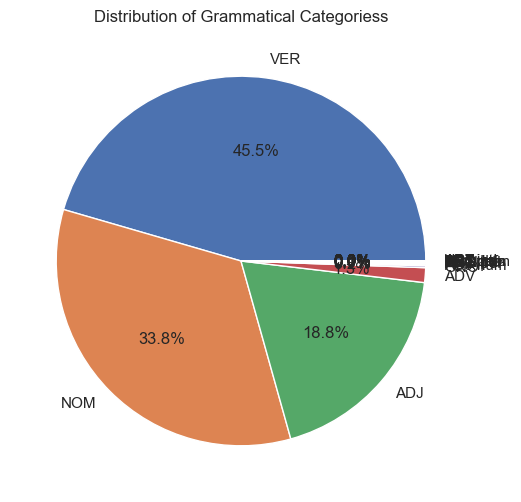

In [53]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
df['cgram'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Grammatical Categoriess')
plt.ylabel('')
plt.show()

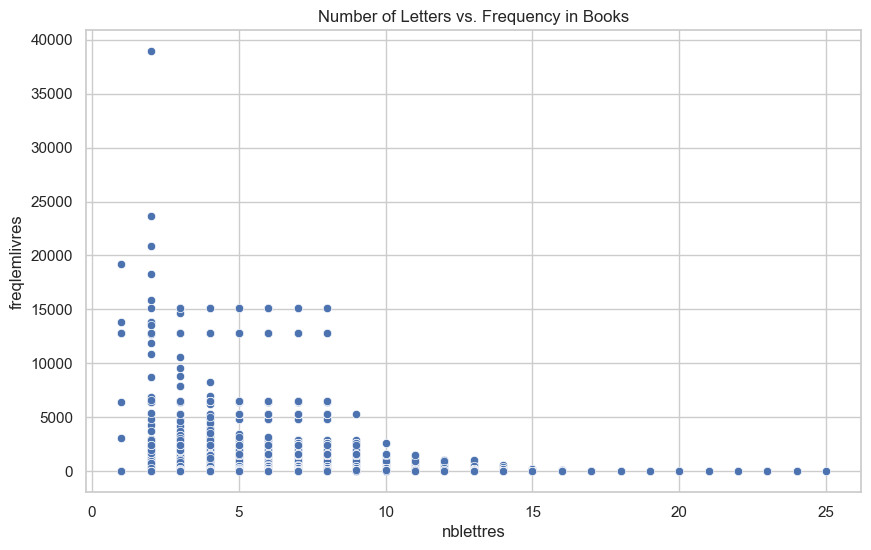

In [54]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='nblettres', y='freqlemlivres', data=df)
plt.title('Number of Letters vs. Frequency in Books')
plt.show()

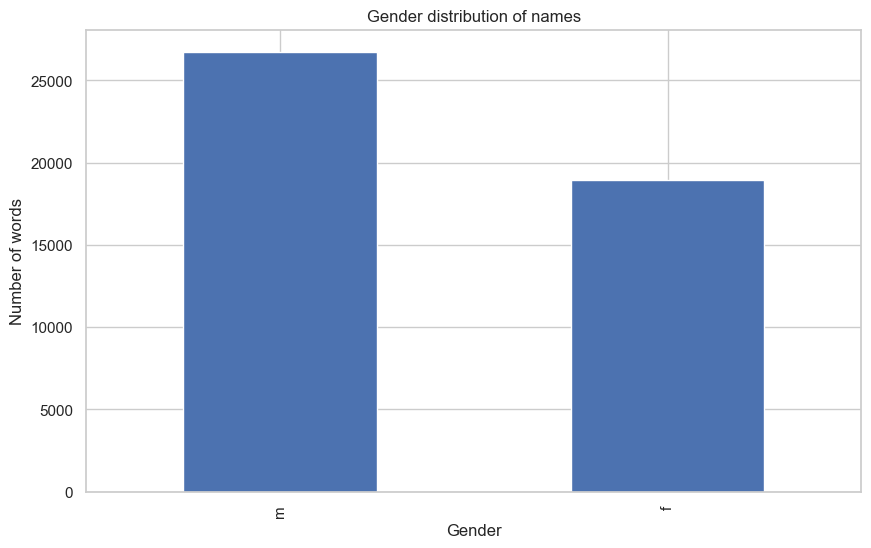

In [55]:
plt.figure(figsize=(10, 6))
df[df['cgram'] == 'NOM']['genre'].value_counts().plot(kind='bar')
plt.title('Gender distribution of names')
plt.xlabel('Gender')
plt.ylabel('Number of words')
plt.show()

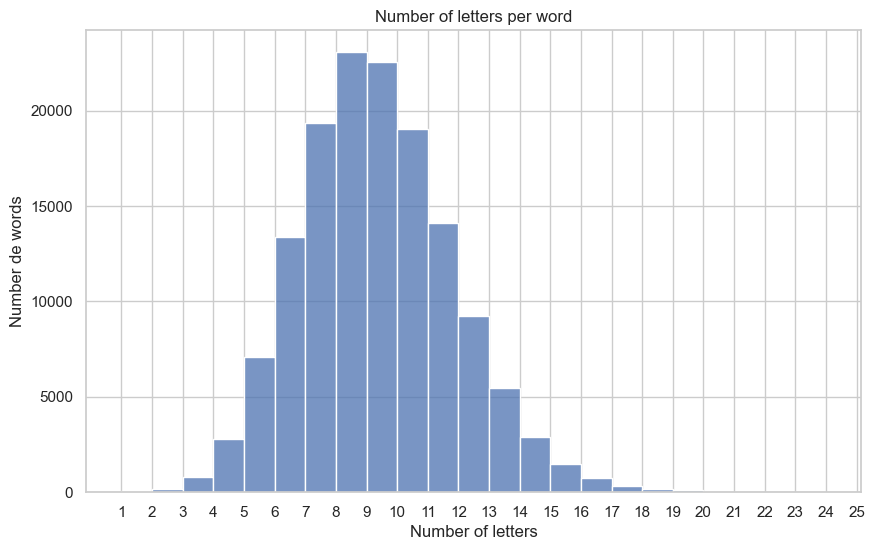

In [56]:
plt.figure(figsize=(10, 6))
sns.histplot(df['nblettres'], bins=range(1, df['nblettres'].max()), kde=False)
plt.title("Number of letters per word")
plt.xlabel("Number of letters")
plt.ylabel("Number de words")
plt.xticks(range(1, df['nblettres'].max() + 1))
plt.show()

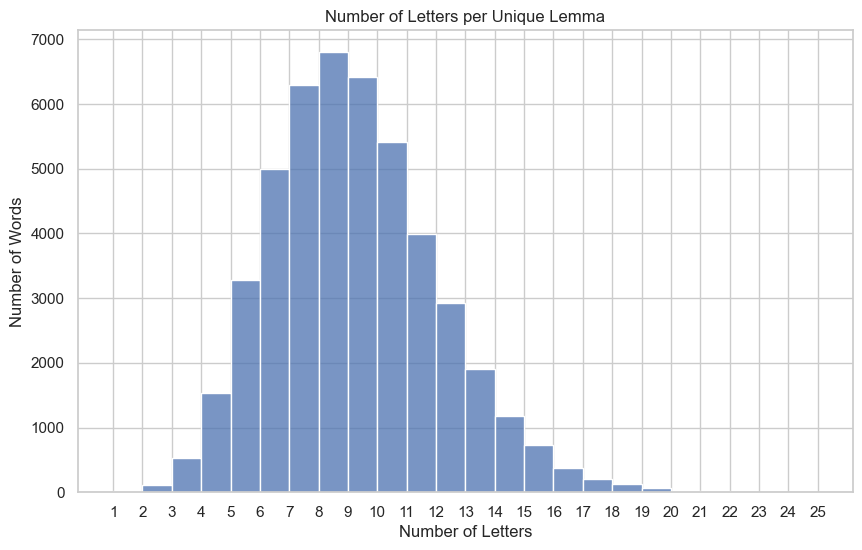

In [57]:
lemmes_uniques = df['lemme'].drop_duplicates()
nblettres_lemmes = lemmes_uniques.str.len()
max_nblettres = int(nblettres_lemmes.max())

# Création du graphique
plt.figure(figsize=(10, 6))
sns.histplot(nblettres_lemmes, bins=range(1, max_nblettres + 1), kde=False)
plt.title("Number of Letters per Unique Lemma")
plt.xlabel("Number of Letters")
plt.ylabel("Number of Words")
plt.xticks(range(1, max_nblettres + 1))
plt.show()

In [64]:
# Display lemmas that appear more than once
lemmes_multiples = df['lemme'][df['islem'] == 1].value_counts()
lemmes_multiples = lemmes_multiples[lemmes_multiples > 1]
print("Lemmas appearing several times:\n", lemmes_multiples)

# Display unique words that are not lemmas
words_unique_non_lemmes = df[~df['lemme'].isin(df[df['islem'] == 1]['lemme'])]['lemme'].unique()
print("\nUnique words that are not lemmas:\n", words_unique_non_lemmes)

Lemmas appearing several times:
 lemme
tout              5
tout-fait         4
une               4
suivant           4
l                 4
                 ..
éwé               2
luxembourgeois    2
meuble            2
zurichois         2
américain         2
Name: count, Length: 3658, dtype: int64

Unique words that are not lemmas:
 ['abandonneur' 'abatture' 'aberrer' ... 'évaluable' 'évaporée'
 'évènementiel']


### Creation of datasets

In [143]:
from unidecode import unidecode

def process(list):
    processWords = [unidecode(str(word)).upper() for word in list if not (' ' in str(word) or '-' in str(word) or any(char.isdigit() for char in str(word)))]
    return sorted(set(processWords))

In [170]:
#lemm = df.lemme.unique()
#ortho = df.ortho.unique()
lemm = df.lemme[df.cgram != 'ONO'].unique()
ortho = df.ortho[df.cgram != 'ONO'].unique()
lemmNotInOrtho = df[~df['lemme'].isin(df['ortho'])]['lemme'][df.cgram != 'ONO'].unique()


processLemm = process(lemm.tolist())
processLemmNotInOrtho = process(lemmNotInOrtho.tolist())
processOrtho = process(ortho.tolist())

validWordsToPlayWith = sorted(processLemmNotInOrtho + processOrtho)
print(len(validWordsToPlayWith))

wordsForTheDraw = processLemm

print(len(wordsForTheDraw))


118438
42451


In [178]:
def saveToDart(list, name):
    content_dart = """const List<String> {0} = {1};""".format(name,list)

    export_name = '{}.dart'.format(name)

    with open(export_name, 'w') as file:
        file.write(content_dart)

In [179]:
saveToDart(validWordsToPlayWith, 'validWordsToPlayWith')
saveToDart(wordsForTheDraw, 'wordsForTheDraw')